In [9]:
# Import dependencies
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Connect to Postgres Database
connection = psycopg2.connect(user = "postgres",
                              password = "postgres",
                              host = "127.0.0.1",
                              port = "5433",
                              database = "covid_db")

cursor = connection.cursor()
    
# Create a table to store data
create_table_query = '''CREATE TABLE table6
          (id int primary key not null,
           country text not null,
           date date not null,
           price float,
           cases float); '''
    
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL")

Table created successfully in PostgreSQL


In [6]:
# Load data from merged CSV into Postgres
file = open('stocks_and_cases.csv', 'r')

cursor.copy_from(file, 'table6', columns=('id','country','date','price','cases'), sep=",")

In [11]:
df = pd.read_sql('select * from table6', connection)

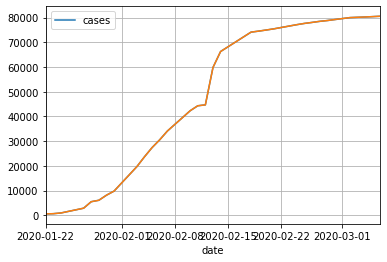

In [18]:
china = pd.read_sql("select * from table6 where country = 'CN'", connection)
china = china[['date','price','cases']]
china.plot(x = 'date', y = 'cases',grid=True)

plt.plot( china['date'], china['cases'], china['price'] * )

AttributeError: 'DataFrame' object has no attribute 'plt'